In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=2000, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0,
                           weights=[0.95, 0.05],
                           random_state=42)

In [3]:
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'] )
y = pd.Series(y, name='target' )

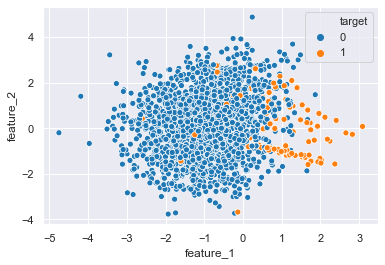

In [4]:
sns.set()
sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y, palette='tab10');

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_test

,feature_1,feature_2
1860,2.179929,-0.478662
353,-0.480964,-0.956624
1333,-1.503589,-1.466327
905,0.950451,2.041321
1289,-1.820793,1.725700
...,...,...
965,0.929080,0.864839
1284,-0.520302,0.347225
1739,-1.417472,2.675593
261,-0.969213,0.333714


In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
model.score(X_train, y_train)

0.9625

In [12]:
model.score(X_test, y_test)

0.96

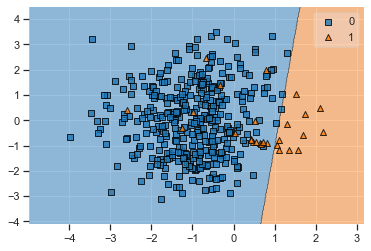

In [19]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(np.array(X_test), np.array(y_test), clf=model);

# Confusion Matrix

Usually, when dealing with a business problem that you have to predict a label, accuracy won't be your only choice of metric. <br>It will heavily depend on your problem. 

- If, for example, you are dealing with a problem trying to predict **the probability of a person being a fraudster**, you may just guess that every person is not a **fraudster** and you'll have a wonderful performance in terms of **accuracy**. For your problem, however, the most important observations you should have predicted correctly were the ones with the `label = 1` (i.e., the fraudster ones). However, you've missed all of them.

This usually happens when your dataset (specifically, the target of your classification) is heavily imbalanced.

The **CONFUSION MATRIX** is a good way to check how your machine learning performs in this more reliable metrics:

There are 4 quadrants here:
    
<u>First, checking the quadrants where you got your answers correctly:</u>

- $1^\underline{st}$ quadrant: 
    - Row: The real value is 0 
    - Column: The predicted value is 0
    - This is called the **TRUE NEGATIVE** (or **TN**). So I got the results correctly and they were predicted **negative** (or 0) for my problem. 
    
    
- $4^\underline{th}$ quadrant: 
    - Row: The real value is 1  
    - Column: The predicted value was 1
    - Again you got it right. But this time, both your output and the real observation has a value of 1, which is the **positive** value in your target variable. This is why this quadrant represents the **TRUE POSITIVE** (or **TP**)
    
<u>Now, the quadrants where we've missed it!</u> This is important to **check how much your errors are costing** to you.

- $2^\underline{nd}$ quadrant: 
    - Row: The real value is 1 
    - Column: The predicted value is 0
    - This time you've commited a mistake. The real value of the observation was supposed to be 1, but you predicted it to be 0. This is called the **FALSE NEGATIVE** (or **FN**). 
    
    
- $3^\underline{rd}$ quadrant: 
    - Row: The real value is 0
    - Column: The predicted value was 1
    - Again, you've made a mistake. The real value of the observation was supposed to be 0, but you've predicted it to be 1. This is called the **FALSE POSITIVE** (or **FP**).

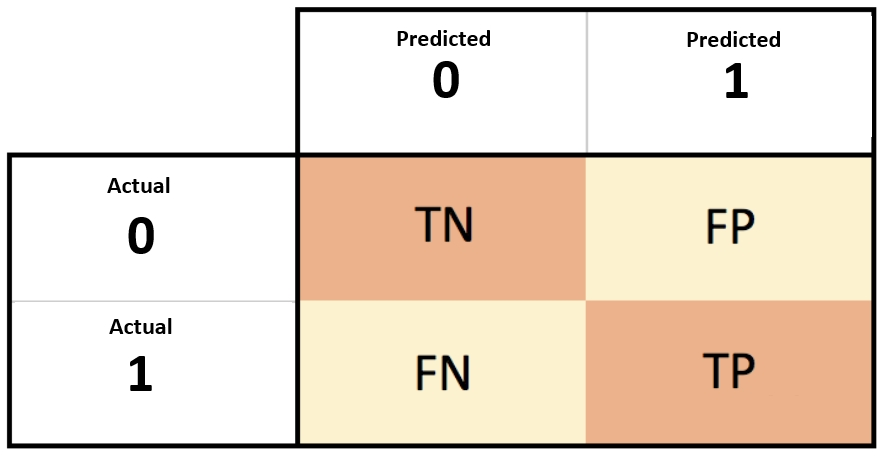

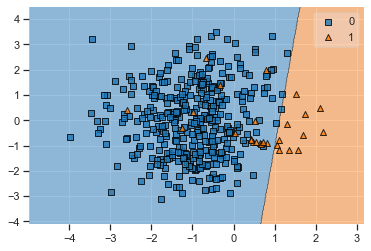

In [22]:
plot_decision_regions(np.array(X_test), np.array(y_test), clf=model);

In [25]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [21]:
confusion_matrix(y_true= y_test, y_pred=model.predict(X_test))

array([[373,   0],
       [ 16,  11]], dtype=int64)

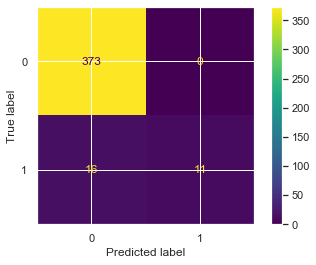

In [32]:
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, values_format='.0f')

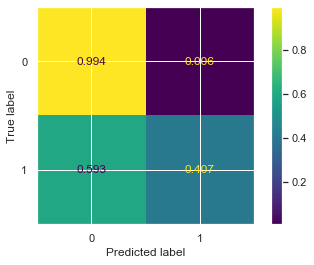

In [33]:
plot_confusion_matrix(model, X, y, values_format='.3f', normalize='true');